In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
match=pd.read_csv(r"C:\Users\Ronit Jariwala\Documents\Stuff\ML Project\IPL Win Probability\matches.csv")
delivery=pd.read_csv(r"C:\Users\Ronit Jariwala\Documents\Stuff\ML Project\IPL Win Probability\deliveries.csv")

In [17]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [18]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [19]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [20]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [21]:
total_score_df=total_score_df[total_score_df['inning']==1]

In [22]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [23]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [24]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [25]:
teams=[
    'Sunrises Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [26]:
match_df['team1']=match_df['team1'].str.replace("Delhi Daredevils","Delhi Capitals")
match_df['team2']=match_df['team2'].str.replace("Delhi Daredevils","Delhi Capitals")

match_df['team1']=match_df['team1'].str.replace("Deccan Chargers","Sunrises Hyderabad")
match_df['team2']=match_df['team2'].str.replace("Deccan Chargers","Sunrises Hyderabad")

In [27]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [30]:
match_df=match_df[match_df['dl_applied']==0]

In [33]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [35]:
delivery_df=match_df.merge(delivery,on='match_id')

In [38]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [42]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [44]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [45]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,0,0,0,NaN,NaN,NaN,0,157
125,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,0,0,0,1,1,NaN,NaN,NaN,1,156
126,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,0,0,0,NaN,NaN,NaN,1,156
127,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,0,0,1,0,1,NaN,NaN,NaN,2,155
128,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,0,0,0,NaN,NaN,NaN,2,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127048,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,0
127049,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-2
127050,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-3
127051,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-5


In [46]:
delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])

In [69]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby(['match_id','inning'])['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,0,1,NaN,NaN,0,157,119,9
125,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,0,1,1,1,NaN,NaN,1,156,118,8
126,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,0,1,NaN,NaN,1,156,117,7
127,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,1,0,1,1,NaN,NaN,2,155,116,6
128,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,0,1,NaN,NaN,2,155,115,5


In [71]:
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

In [72]:
delivery_df['rrr']=(delivery_df['runs_left']*6)/delivery_df['balls_left']

In [73]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
124,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,1,NaN,NaN,0,157,119,9,0.000000,7.915966
125,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,1,1,NaN,NaN,1,156,118,8,3.000000,7.932203
126,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,1,NaN,NaN,1,156,117,7,2.000000,8.000000
127,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,1,1,NaN,NaN,2,155,116,6,3.000000,8.017241
128,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,1,NaN,NaN,2,155,115,5,2.400000,8.086957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127048,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,1,NaN,NaN,152,0,4,-110,7.862069,0.000000
127049,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,1,NaN,NaN,154,-2,3,-111,7.897436,-4.000000
127050,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-3,2,-112,7.881356,-9.000000
127051,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,1,NaN,NaN,157,-5,1,-113,7.915966,-30.000000


In [74]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [75]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [77]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
124,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,1,NaN,NaN,0,157,119,9,0.000000,7.915966,0
125,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,1,NaN,NaN,1,156,118,8,3.000000,7.932203,0
126,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,1,NaN,NaN,1,156,117,7,2.000000,8.000000,0
127,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,1,NaN,NaN,2,155,116,6,3.000000,8.017241,0
128,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,1,NaN,NaN,2,155,115,5,2.400000,8.086957,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127048,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,NaN,NaN,152,0,4,-110,7.862069,0.000000,0
127049,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,1,NaN,NaN,154,-2,3,-111,7.897436,-4.000000,0
127050,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-3,2,-112,7.881356,-9.000000,0
127051,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,1,NaN,NaN,157,-5,1,-113,7.915966,-30.000000,0


In [81]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [82]:
final_df=final_df.sample(final_df.shape[0])

In [95]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
76307,Delhi Daredevils,Kolkata Knight Riders,Raipur,97,77,-34,136,5.44186,7.558442,1


In [100]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            583
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr               0
rrr               6
result            0
dtype: int64

In [101]:
final_df.dropna(inplace=True)

In [113]:
final_df=final_df[final_df['balls_left']!=0]

In [115]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [116]:
import sklearn
print(sklearn.__version__)

1.5.2


In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')


In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [132]:
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [133]:
pipe.fit(X_train,y_train)

C:\Users\Ronit Jariwala\AppData\Roaming\Python\Python311\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [134]:
X_train.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,48526.000000,48526.000000,48526.000000,48526.000000,48526.000000,48526.000000
mean,92.775646,63.122903,-48.868668,165.501793,7.437271,10.300878
std,50.014109,33.219608,34.361699,29.367673,2.287948,13.249971
min,-16.000000,-2.000000,-123.000000,65.000000,0.000000,-510.000000
25%,53.000000,35.000000,-78.000000,147.000000,6.260870,7.132075
50%,92.000000,64.000000,-48.000000,165.000000,7.482353,8.906250
75%,130.000000,92.000000,-19.000000,185.000000,8.689655,10.897959
max,249.000000,119.000000,9.000000,250.000000,42.000000,582.000000


In [136]:
y_pred=pipe.predict(X_test)

In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7898944939004287

In [130]:
pipe.predict_proba(X_test)[10]

array([1., 0.])

In [138]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [143]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [152]:
temp_df,target = match_progression(delivery_df,5,pipe)
temp_df

Target- 157


,end_of_over,runs_after_over,wickets_in_over,lose,win
129,1,6,6,30.6,69.4
136,2,7,7,32.4,67.6
142,3,8,6,31.5,68.5
148,4,11,6,25.5,74.5
154,5,5,6,30.0,70.0
160,6,6,6,33.0,67.0
166,7,10,6,28.9,71.1
172,8,10,6,25.1,74.9
180,9,7,8,28.3,71.7
186,10,9,6,26.2,73.8


Text(0.5, 1.0, 'Target-157')

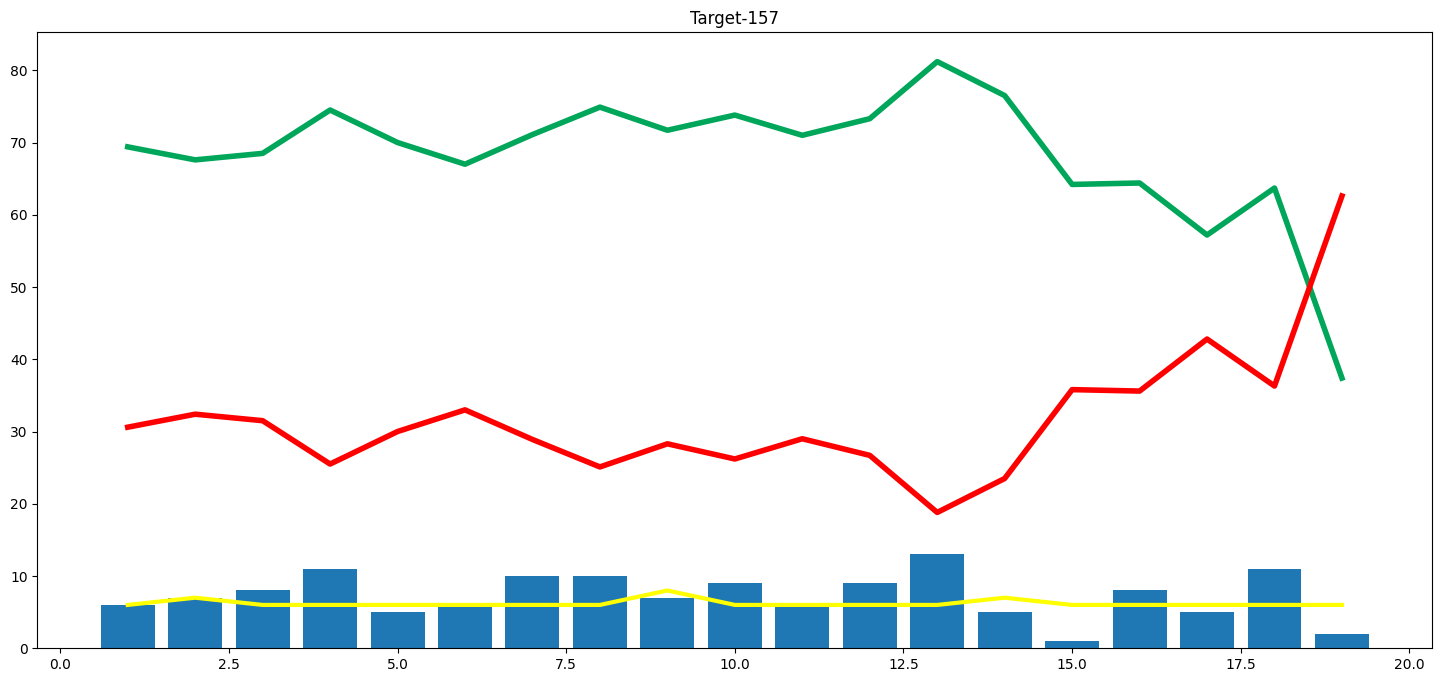

In [153]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [154]:
teams

['Sunrises Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [157]:
delivery_df['city'].unique()

array(['Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi', 'Chandigarh',
       'Jaipur', 'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [158]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))